# Ensemble Learning

## Initial Imports

In [324]:
import warnings
warnings.filterwarnings('ignore')

In [325]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [326]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Read the CSV and Perform Basic Data Cleaning

In [327]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [328]:
label_encoder = LabelEncoder()

In [329]:
label_encoder.fit(df["loan_status"])
df["loan_stat"] = label_encoder.transform(df["loan_status"])
df.drop(["loan_status"], axis=1, inplace=True)

In [330]:
label_encoder.fit(df["application_type"])
df["app_type"] = label_encoder.transform(df["application_type"])
df.drop(["application_type"], axis=1, inplace=True)

In [331]:
label_encoder.fit(df["hardship_flag"])
df["hardship_f"] = label_encoder.transform(df["hardship_flag"])
df.drop(["hardship_flag"], axis=1, inplace=True)

In [332]:
label_encoder.fit(df["debt_settlement_flag"])
df["debt_settlement_f"] = label_encoder.transform(df["debt_settlement_flag"])
df.drop(["debt_settlement_flag"], axis=1, inplace=True)

In [333]:
label_encoder.fit(df["next_pymnt_d"])
df["next_payment"] = label_encoder.transform(df["next_pymnt_d"])
df.drop(["next_pymnt_d"], axis=1, inplace=True)

In [334]:
label_encoder.fit(df["pymnt_plan"])
df["payment_plan"] = label_encoder.transform(df["pymnt_plan"])
df.drop(["pymnt_plan"], axis=1, inplace=True)

In [335]:
label_encoder.fit(df["initial_list_status"])
df["initial_list_stat"] = label_encoder.transform(df["initial_list_status"])
df.drop(["initial_list_status"], axis=1, inplace=True)

In [336]:
# Binary encoding using Pandas (multiple columns)
df = pd.get_dummies(df, columns=["home_ownership", "verification_status","issue_d"])
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019
0,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,0,0,1
1,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,0,1,0,0,0,0,1,0,0,1
2,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,0,1,0,0,0,0,1,0,0,1
3,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,0,0,0,1,0,0,1,0,0,1
4,22000.0,0.1474,520.39,52000.0,18.76,0.0,1.0,14.0,0.0,9091.0,...,0,1,0,0,1,0,0,0,0,1


In [338]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019
0,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,0,0,1
1,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,0,1,0,0,0,0,1,0,0,1
2,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,0,1,0,0,0,0,1,0,0,1
3,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,0,0,0,1,0,0,1,0,0,1
4,22000.0,0.1474,520.39,52000.0,18.76,0.0,1.0,14.0,0.0,9091.0,...,0,1,0,0,1,0,0,0,0,1


## Split the Data into Training and Testing

In [339]:
x_cols = [i for i in df.columns if i not in ('loan_stat')]

# Create our features
X = df[x_cols]

# Create our target
y = df['loan_stat']
y=y.astype('int')

In [340]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.009285,0.526309,0.106747,0.357659,0.478007,0.373992,0.148001,0.371696,0.451066,0.177238
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.095914,0.499311,0.308793,0.479314,0.499520,0.483865,0.355104,0.483261,0.497603,0.381873
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [341]:
# Check the balance of our target values
# YOUR CODE HERE

y.value_counts()

1    68470
0      347
Name: loan_stat, dtype: int64

In [342]:
# Split the X and y into X_train, X_test, y_train, y_test
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [343]:
# Create the StandardScaler instance
# YOUR CODE HERE
# YOUR CODE HERE

scaler = StandardScaler()

In [344]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE

X_scaler = scaler.fit(X_train)

In [345]:
# Scale the training and testing data
# YOUR CODE HERE


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [346]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [347]:
y_pred = brf.predict(X_test)

In [348]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

balanced_accuracy_score(y_test, y_pred)

0.767546124350508

In [349]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred)

array([[   67,    34],
       [ 2194, 14910]])

In [350]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.03      0.66      0.87      0.06      0.76      0.57       101
          1       1.00      0.87      0.66      0.93      0.76      0.59     17104

avg / total       0.99      0.87      0.66      0.93      0.76      0.59     17205



In [351]:
# List the features sorted in descending order by feature importance
# YOUR CODE HERE

importances = brf.feature_importances_

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

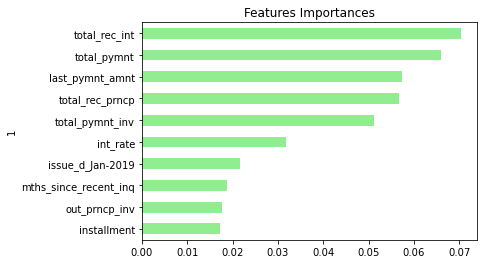

In [353]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(brf.feature_importances_, X.columns), reverse=True)[:10])
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Easy Ensemble Classifier

In [354]:
# Train the Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [355]:
y_pred = rf.predict(X_test)

In [356]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

balanced_accuracy_score(y_test, y_pred)

0.6879726472413378

In [357]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred)

array([[   38,    63],
       [    5, 17099]])

In [359]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.38      1.00      0.53      0.61      0.35       101
          1       1.00      1.00      0.38      1.00      0.61      0.40     17104

avg / total       1.00      1.00      0.38      1.00      0.61      0.40     17205



### Final Questions

1. Which model had the best balanced accuracy score?

    The Balanced Random Forest Classifier has the best balanced accuracy score.

2. Which model had the best recall score?

    The Balanaced Random Forest Classifier has the best recall score. 

3. Which model had the best geometric mean score?

    The Balanced Random Forest Classifier has the best geometric mean score.

4. What are the top three features?

    The top three features in order of importance are: total_rec_int, total_pymnt, and last_pymnt_amnt.

In [366]:
from sklearn.metrics import precision_recall_curve

probs_brf = brf.predict_proba(X_test)[:, 1]
probs_rf = rf.predict_proba(X_test)[:, 1]
precision_brf, recall_brf, _ = precision_recall_curve(y_test, probs_brf, pos_label=1)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf, pos_label=1)

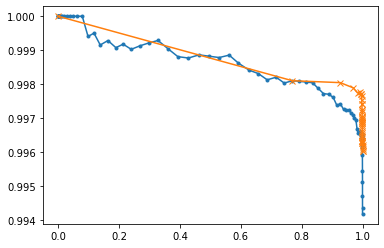

In [367]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall_brf, precision_brf, marker='.')
plt.plot(recall_rf, precision_rf, marker='x')